Original dataset shape: (1797, 64)


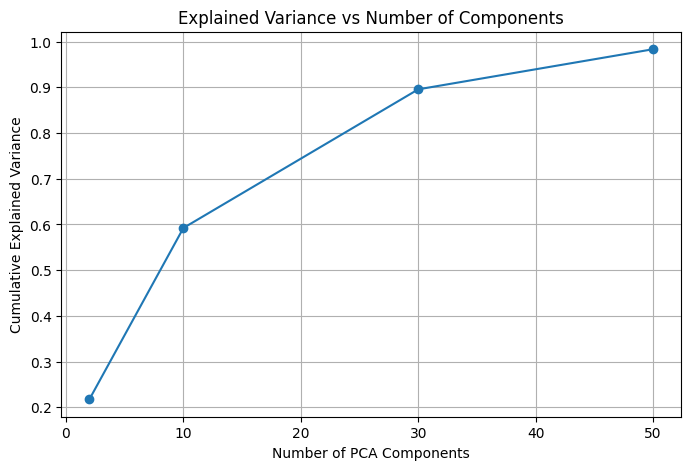

Accuracy with original features: 0.9722
Accuracy with PCA (30 components): 0.9611


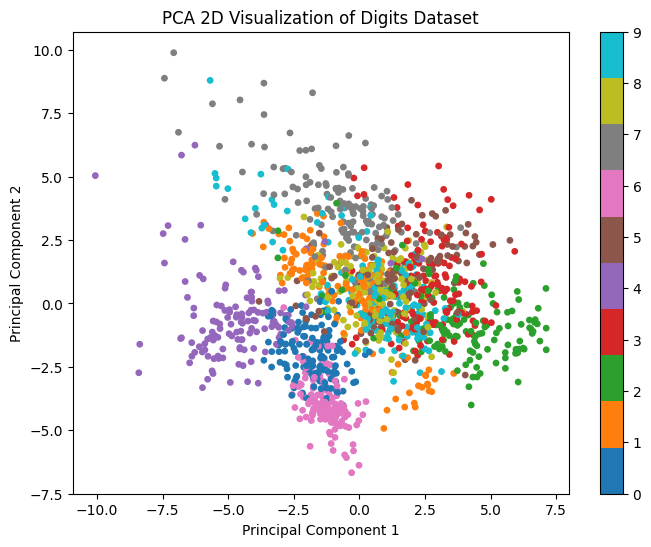

In [1]:
# Task 13: PCA – Dimensionality Reduction
# Dataset: Sklearn Digits Dataset

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# -------------------------------
# 1. Load dataset
# -------------------------------
digits = load_digits()
X = digits.data          # shape (1797, 64)
y = digits.target

print("Original dataset shape:", X.shape)

# -------------------------------
# 2. Train-test split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 3. Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# 4. PCA with multiple components
# -------------------------------
components = [2, 10, 30, 50]
explained_variances = []

for n in components:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled)
    explained_variances.append(np.sum(pca.explained_variance_ratio_))

# -------------------------------
# 5. Plot cumulative explained variance
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(components, explained_variances, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs Number of Components")
plt.grid()
plt.show()

# -------------------------------
# 6. Train Logistic Regression
#    (Original vs PCA-reduced)
# -------------------------------

# Original data model
lr_original = LogisticRegression(max_iter=5000)
lr_original.fit(X_train_scaled, y_train)
y_pred_original = lr_original.predict(X_test_scaled)
acc_original = accuracy_score(y_test, y_pred_original)

print(f"Accuracy with original features: {acc_original:.4f}")

# PCA-reduced model (30 components)
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LogisticRegression(max_iter=5000)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy with PCA (30 components): {acc_pca:.4f}")

# -------------------------------
# 7. PCA 2D Visualization
# -------------------------------
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_2d[:, 0], X_2d[:, 1],
    c=y_train, cmap='tab10', s=15
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Visualization of Digits Dataset")
plt.colorbar(scatter)
plt.show()
